In [1]:
import os
os.environ["OMP_NUM_THREADS"]="1"
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("C:/Users/user/Downloads/Mall_Customers.csv")

In [3]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [6]:
col = ['Gender']
for i in col:
    data[i] = le.fit_transform(data[i])
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


In [7]:
data.drop("CustomerID",axis=1,inplace=True)
data


,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [8]:
x = data

In [9]:
from scipy.cluster.hierarchy import dendrogram,linkage,fcluster #fcluster - no.of clusters
from sklearn.metrics import silhouette_score

In [10]:
l = linkage(x,method="ward")
l

array([[ 65.        ,  68.        ,   1.        ,   2.        ],
       [129.        , 131.        ,   1.        ,   2.        ],
       [  3.        ,   5.        ,   1.73205081,   2.        ],
       [ 48.        ,  49.        ,   2.        ,   2.        ],
       [106.        , 109.        ,   2.23606798,   2.        ],
       [100.        , 105.        ,   2.23606798,   2.        ],
       [114.        , 115.        ,   2.23606798,   2.        ],
       [ 92.        ,  96.        ,   2.44948974,   2.        ],
       [147.        , 159.        ,   2.44948974,   2.        ],
       [133.        , 137.        ,   2.64575131,   2.        ],
       [101.        , 207.        ,   2.94392029,   3.        ],
       [ 13.        ,  15.        ,   3.        ,   2.        ],
       [ 83.        ,  85.        ,   3.        ,   2.        ],
       [117.        , 119.        ,   3.        ,   2.        ],
       [156.        , 158.        ,   3.        ,   2.        ],
       [ 16.        ,  20

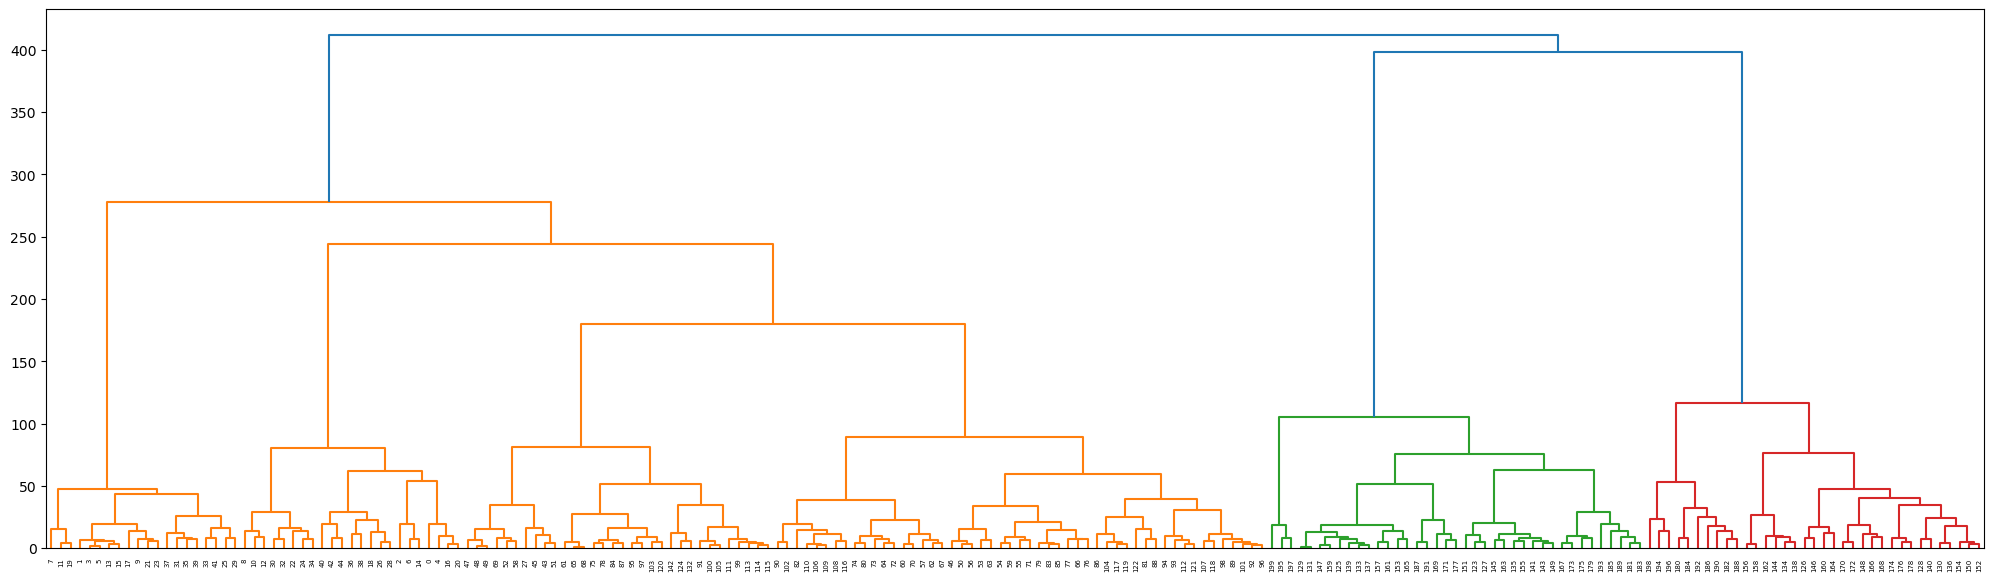

In [11]:
plt.figure(figsize=[25,7])
dendrogram(l)
plt.show()

In [12]:
best_k = 0
best_score = -1
for k in range(2,11):
    labels = fcluster(l,t=k,criterion="maxclust") #t= no of clusters
    score = silhouette_score(x,labels)
    print("k=",k,"| score = ",score)

    if score > best_score:
        best_k=k
        best_score=score
print("number of cluster:",best_k)



k= 2 | score =  0.29916602844367
k= 3 | score =  0.3812859576468096
k= 4 | score =  0.4102091359195185
k= 5 | score =  0.43997527212476695
k= 6 | score =  0.4428008535928764
k= 7 | score =  0.42593881050851595
k= 8 | score =  0.4223297424559345
k= 9 | score =  0.37773214836148283
k= 10 | score =  0.3612629591916317
number of cluster: 6


In [13]:
data["h cluster"]=fcluster(l,t=best_k,criterion="maxclust")
data

,Gender,Age,Annual Income (k$),Spending Score (1-100),h cluster
0,1,19,15,39,2
1,1,21,15,81,1
2,0,20,16,6,2
3,0,23,16,77,1
4,0,31,17,40,2
...,...,...,...,...,...
195,0,35,120,79,5
196,0,45,126,28,6
197,1,32,126,74,5
198,1,32,137,18,6


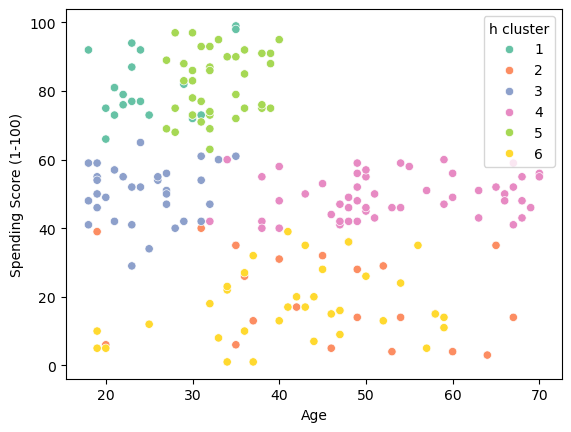

In [14]:
sns.scatterplot(data,x="Age",y="Spending Score (1-100)",hue="h cluster",palette="Set2")
plt.show()

In [15]:
data.groupby("h cluster").mean()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
h cluster,,,,
1,0.400000,24.850000,24.950000,81.000000
2,0.391304,45.217391,26.304348,20.913043
3,0.375000,24.531250,54.187500,50.250000
4,0.411765,53.215686,55.117647,49.470588
5,0.461538,32.692308,86.538462,82.128205
6,0.571429,41.685714,88.228571,17.285714


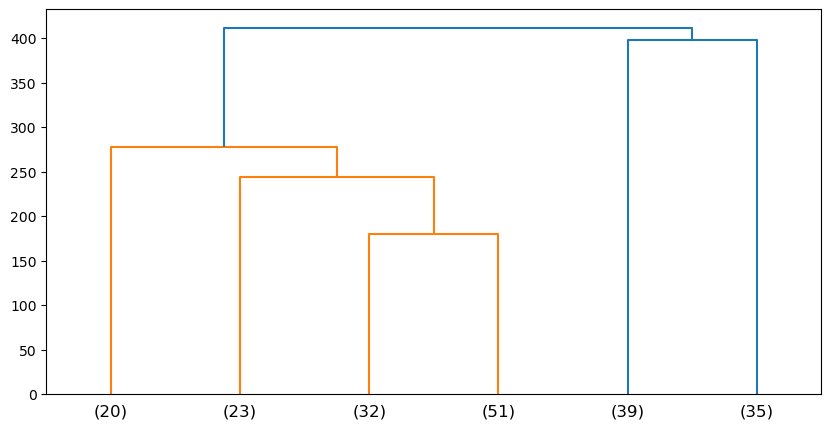

In [16]:
plt.figure(figsize=[10,5])
dendrogram(l,truncate_mode = "lastp",p=best_k)
plt.show()

In [17]:
from sklearn.cluster import AgglomerativeClustering
ag = AgglomerativeClustering(n_clusters = best_k,linkage = "ward")


In [18]:
data["Agg cluster"] = ag.fit_predict(x)
data

,Gender,Age,Annual Income (k$),Spending Score (1-100),h cluster,Agg cluster
0,1,19,15,39,2,4
1,1,21,15,81,1,3
2,0,20,16,6,2,4
3,0,23,16,77,1,3
4,0,31,17,40,2,4
...,...,...,...,...,...,...
195,0,35,120,79,5,2
196,0,45,126,28,6,0
197,1,32,126,74,5,2
198,1,32,137,18,6,0


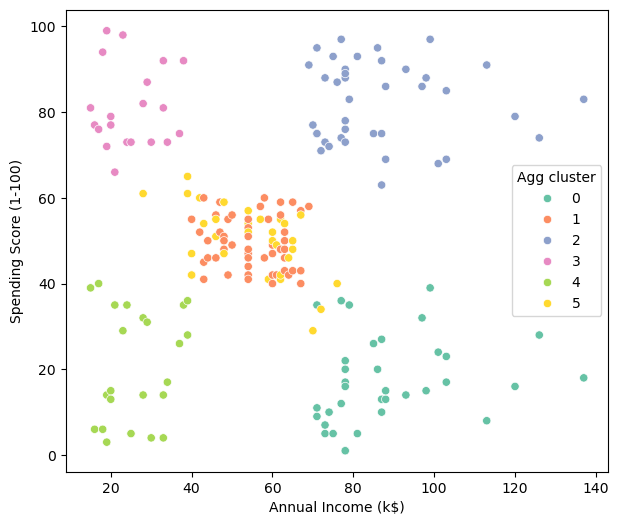

In [19]:
plt.figure(figsize =(7,6))
sns.scatterplot(data,x="Annual Income (k$)",y ="Spending Score (1-100)",hue ="Agg cluster",palette="Set2")
plt.show()

In [20]:
from sklearn.cluster import KMeans


In [21]:
best_k = 0
best_score = -1
for i in range (2,11):
    km= KMeans(n_clusters = i)
    labels = km.fit_predict(x)
    score = silhouette_score(x,labels)
    print("k=",i,"| score = ",score)

    if score>best_score:
        best_k = i
        best_score = score

print(best_k)

k= 2 | score =  0.2926334020166175
k= 3 | score =  0.38371196805811186
k= 4 | score =  0.39003982052914027
k= 5 | score =  0.4402150055919279
k= 6 | score =  0.41661460375841286
k= 7 | score =  0.44212388735115843
k= 8 | score =  0.3829656417522744
k= 9 | score =  0.390305437412282
k= 10 | score =  0.3456350335404116
7


In [22]:
inertia = []
k_range = range(2,11)
for i in k_range:
    km =KMeans(n_clusters = i)
    km.fit(x)
    inertia.append(km.inertia_)

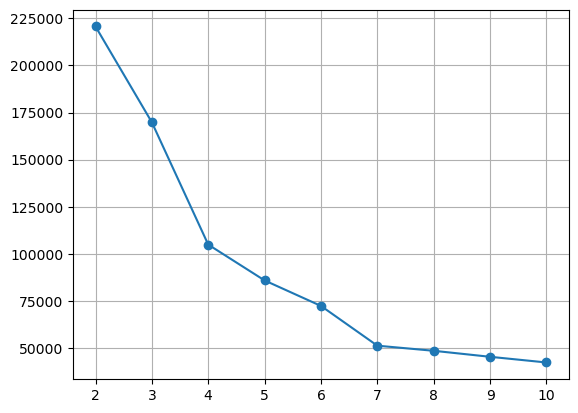

In [23]:

plt.plot(k_range,inertia,marker = "o")
plt.grid(True)
plt.show()

In [24]:
from kneed import KneeLocator
kl = KneeLocator(k_range,inertia,curve="convex",direction="decreasing")
optimal_k = kl.knee
optimal_k

4

In [25]:
#!pip install kneed

In [26]:
km1 = KMeans(n_clusters = optimal_k)
data["km_cluster"]= km1.fit_predict(x)
data

,Gender,Age,Annual Income (k$),Spending Score (1-100),h cluster,Agg cluster,km_cluster
0,1,19,15,39,2,4,3
1,1,21,15,81,1,3,3
2,0,20,16,6,2,4,1
3,0,23,16,77,1,3,3
4,0,31,17,40,2,4,1
...,...,...,...,...,...,...,...
195,0,35,120,79,5,2,0
196,0,45,126,28,6,0,2
197,1,32,126,74,5,2,0
198,1,32,137,18,6,0,2


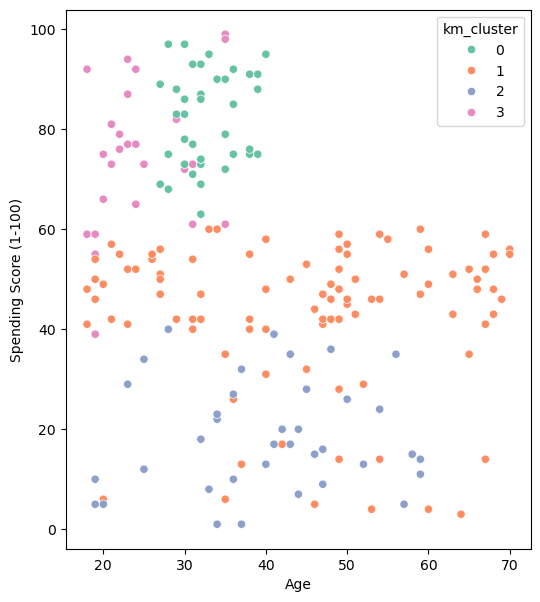

In [27]:
plt.figure(figsize =(6,7))
sns.scatterplot(data,x="Age",y="Spending Score (1-100)",hue ="km_cluster",palette ="Set2")
plt.show()